In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

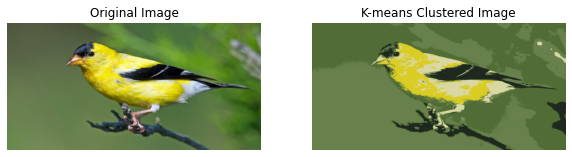

In [4]:
# Load the image
image = cv2.imread('input/bird.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = image.reshape(-1, 3)

# Apply K-means clustering
k = 5  # Number of clusters/colors
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Replace each pixel value with its corresponding centroid value
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape).astype(np.uint8)

segmented_img_bgr = cv2.cvtColor(segmented_img, cv2.COLOR_RGB2BGR)

# Save the clustered image
cv2.imwrite('output/segmented_image.jpg', segmented_img_bgr)

# Display the original and clustered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title('K-means Clustered Image')
plt.axis('off')

plt.show()
